### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio 1.0 : Pandas:

1. Manejo de datos con pandas:

El siguiente [link](
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
), contiene un DataSet con informacion que permite predecir si un cancer es benigno o maligno. Un detalle del dataset es dado a continuación:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Para el dataset realizar lo siguiente:

1. Leer los datos desde un archivo en el  git_hub.

2. Renombrar las columnas en PascalCase
  Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe

3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe,

4. Contabilizar la cantidad de null or nan en el dataframe, replazar por el valor medio de cada columna.

5. Encontrar los valores  diferentes en la columna Diagnosis, mostrar que es B y M. Emplear el metodo unique.

6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

  ```python
  import seaborn as sns
  sns.countplot?
  ```

7. Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.

8. Elimninar la columna id.

9. Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x)

10. En un mismo gráfico mostrar el histograma de la columna RadiusMean  para la etiqueta B y M en color naranja y azul de la columna Diagnosis respectivamente.

11. Para las columnas:
```python
cols=['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean']
```
realizar multiples histograma en un gráfico de [violin](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

10. Determinar los datos [outlier](https://en.wikipedia.org/wiki/Outlier)  para la columna RadiusMean y eliminarlos del data frame, para ello construya un gráfico tipo [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

```
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))
```
¿Qué informacion podemos obtener de este tipo de graficos?


Usar el rango intercuartílico (IQR): El IQR es la diferencia entre el tercer y el primer cuartil de los datos, es decir, el 75% y el 25% de los valores ordenados. Los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de una columna llamada 'edad' usando el IQR, podemos hacer lo siguiente

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra forma de determinar los outlier es con el puntaje Z:
El puntaje Z es el número de desviaciones estándar que un valor está por encima o por debajo de la media. Los valores que tienen un puntaje Z mayor que un umbral (por ejemplo, 3) se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de la columna 'edad' usando el puntaje Z, podemos hacer lo siguiente:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

En un problema de machine learning se debe elegir todas las columnas y construir un algoritmo que permite obtener la mejor calidad de los datos sobre todas las columnas.


11. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

12. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



# Laboratorio 1.1: Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


```python
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


5. Para el data frame, seleccionemos solo los. datos del 2023.

5. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

6. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


Realiza gráfico análogo a esta (referencia)[https://seaborn.pydata.org/examples/kde_ridgeplot.html]















<!--
En este [link](http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt) se encuentra un
  data set que tiene información de la temperatura de la tierra desde 1850. Descripción de cada unas de las variables e información es detallada en el interior del archivo.


1. Leer el archivo de datos
2. Construir un dataframe con las columnas:

```
columns = ["Year","Month","MonthlyA","MonthlyUnc","AnnuealA","AnnuealUnc",\
           "FiveA","AnnuealUnc","TenA","AnnuealUnc","TwentyA","AnnuealUnc"]
```
3. Construir una nueva columna tipo string llamada Date con la informacion del Year y Month

4. Emplear el commando [datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) para dar el formato tipo date  a la nueva columna Date.
  
  ```
  df["Date"] = pd.to_datetime(df["Date"],format='%Y%m')
  ```
5. Emplear el metodo groupby and grouper para tomar los datos con un periodicidad mensual. Notese que freq permite variar la periodicidad con la que se quieren mostrar los datos. Pruebe para freq="2M", "3M", "Y", "H".

  ```
  T_serie = df.groupby(pd.Grouper(key='date', freq='M')).mean()
  ```


6. Realice un gráfico del tiempo como función de  MonthlyA.

7. ¿Que puede concluir? -->


Referencias

- [It’s Not Your Imagination. Summers Are Getting Hotter](https://www.nytimes.com/interactive/2021/climate/extreme-summer-heat.html)

- http://berkeleyearth.org/data/

- http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

1. Leer los datos desde un archivo en el  git_hub.

In [41]:
path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/data_cancerWisconsin.csv" #este codigo guarda el la ruta del dataset como un string que se encuetra en github.
df = pd.read_csv(f"{path}")                #Esta linea se utiliza para leer el arcivo CSV que se encuentre en la ruta con nombre "path" , f{"path"} no proporciona el contenido del string.

2. Renombrar las columnas en PascalCase
  Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe
  

In [42]:
c = df.columns
new_colums = []

for i,j in enumerate(c):             # Itera a través de las columnas obtenidas en c.
  x = j.replace("_"," ").split()     # Reemplaza ('_') con espacios y luego divide el string resultante en una lista de palabras.
  x2 = ""                            #incializamos el string cada que pasemos por el primer ciclo.
  for k in x:                        # Itera a través de las palabras en la lista 'x'.
    x1 = k.capitalize()              #Pasamos a mayuscula la primera letra de cada parabra en 'x'.
    x2 = x2 + x1                     #Juntamos las palabras de cada lista ahora con cada string en PascalCase.
  new_colums.append(x2)              #finalmente se guarda cada string unido en una lista.

display(new_colums)

['Id',
 'Diagnosis',
 'RadiusMean',
 'TextureMean',
 'PerimeterMean',
 'AreaMean',
 'SmoothnessMean',
 'CompactnessMean',
 'ConcavityMean',
 'ConcavePointsMean',
 'SymmetryMean',
 'FractalDimensionMean',
 'RadiusSe',
 'TextureSe',
 'PerimeterSe',
 'AreaSe',
 'SmoothnessSe',
 'CompactnessSe',
 'ConcavitySe',
 'ConcavePointsSe',
 'SymmetrySe',
 'FractalDimensionSe',
 'RadiusWorst',
 'TextureWorst',
 'PerimeterWorst',
 'AreaWorst',
 'SmoothnessWorst',
 'CompactnessWorst',
 'ConcavityWorst',
 'ConcavePointsWorst',
 'SymmetryWorst',
 'FractalDimensionWorst',
 'Unnamed:32']

3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe.

In [43]:
df.columns = new_colums
df.head()

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
df.tail()

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [45]:
df.describe()

,Id,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,Unnamed:32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     569 non-null    int64  
 1   Diagnosis              569 non-null    object 
 2   RadiusMean             569 non-null    float64
 3   TextureMean            569 non-null    float64
 4   PerimeterMean          569 non-null    float64
 5   AreaMean               569 non-null    float64
 6   SmoothnessMean         569 non-null    float64
 7   CompactnessMean        569 non-null    float64
 8   ConcavityMean          569 non-null    float64
 9   ConcavePointsMean      569 non-null    float64
 10  SymmetryMean           569 non-null    float64
 11  FractalDimensionMean   569 non-null    float64
 12  RadiusSe               569 non-null    float64
 13  TextureSe              569 non-null    float64
 14  PerimeterSe            569 non-null    float64
 15  AreaSe

4. Contabilizar la cantidad de null or nan en el dataframe, replazar por el valor medio de cada columna.


In [47]:
df.isna().sum()

Id                         0
Diagnosis                  0
RadiusMean                 0
TextureMean                0
PerimeterMean              0
AreaMean                   0
SmoothnessMean             0
CompactnessMean            0
ConcavityMean              0
ConcavePointsMean          0
SymmetryMean               0
FractalDimensionMean       0
RadiusSe                   0
TextureSe                  0
PerimeterSe                0
AreaSe                     0
SmoothnessSe               0
CompactnessSe              0
ConcavitySe                0
ConcavePointsSe            0
SymmetrySe                 0
FractalDimensionSe         0
RadiusWorst                0
TextureWorst               0
PerimeterWorst             0
AreaWorst                  0
SmoothnessWorst            0
CompactnessWorst           0
ConcavityWorst             0
ConcavePointsWorst         0
SymmetryWorst              0
FractalDimensionWorst      0
Unnamed:32               569
dtype: int64

De lo anterior concluimos que el total de dastos NaN es de 596 todos en la columna Unnamed:32.


In [48]:
df.isnull().sum()

Id                         0
Diagnosis                  0
RadiusMean                 0
TextureMean                0
PerimeterMean              0
AreaMean                   0
SmoothnessMean             0
CompactnessMean            0
ConcavityMean              0
ConcavePointsMean          0
SymmetryMean               0
FractalDimensionMean       0
RadiusSe                   0
TextureSe                  0
PerimeterSe                0
AreaSe                     0
SmoothnessSe               0
CompactnessSe              0
ConcavitySe                0
ConcavePointsSe            0
SymmetrySe                 0
FractalDimensionSe         0
RadiusWorst                0
TextureWorst               0
PerimeterWorst             0
AreaWorst                  0
SmoothnessWorst            0
CompactnessWorst           0
ConcavityWorst             0
ConcavePointsWorst         0
SymmetryWorst              0
FractalDimensionWorst      0
Unnamed:32               569
dtype: int64

Debido a que todos los NaN se encuentran en una única columna, no disponemos de un valor promedio para reemplazar los NaN. Por lo tanto, procedemos a eliminar la columna por completo.

In [49]:
df1 = df.drop(['Unnamed:32'], axis=1)        #Nuevo dataframe sin la columna final Unnamed:32.

5. Encontrar los valores  diferentes en la columna Diagnosis, mostrar que es B y M. Emplear el metodo unique.

In [50]:
df1.Diagnosis.unique()                      #Esta línea nos entrega un array con los valores únicos en la columna Diagnosis.

array(['M', 'B'], dtype=object)

6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

<Axes: xlabel='Diagnosis', ylabel='count'>

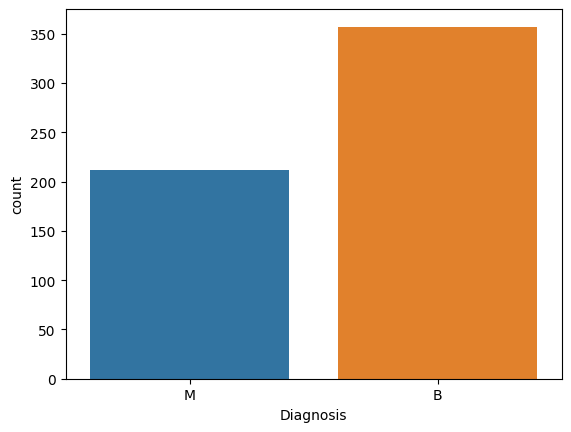

In [51]:
sns.countplot(data=df, x="Diagnosis")

7. Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.


In [52]:
df1['DiagnosisNumeric'] = 0               #Al dataframe le agregamos una nueva columna llamada 'DiagnosisNumeric' con valores igual a cero.
df1

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [53]:
#Definimos una función para asignar el valor adecuado a cada fila de la columna DiagnosisNumeric.

def binario(x):                         #La función resive un valor booleano.
  if x == True:                         #Si le entregamos un valor true la función nos entregara uno y un valor false entrega un cero.
    return 1
  else:
    return 0
#Creamos un filtro con los valores de la columna Diagnosis.
filt1 = df1['Diagnosis'] == 'B'         #Si el valor es igual a 'B' nos entregara un True de lo contrario no entregara un False.
#print(filt1)
m1 = map(binario,filt1)                 #Utilizamos la función map con binario y el filtro como objeto iterable.
val_ND = list(m1)
df1['DiagnosisNumeric'] = val_ND        #Finalmente asignamos la columna DiagnosisNumeric los valores utilizando el filtro y la función bianario.
df1

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


8. Elimninar la columna id.

In [54]:
df2 = df1.drop(['Id'], axis=1)     #Nuevo dataframe sin la columna inicial Id.
df2



,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


9. Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x).

In [55]:
val_D = df2['Diagnosis']                     #Guardamos los valores de la columna diagnosis para utilizarlos mas adelante.
df2 = df2.drop(['Diagnosis'], axis = 1 )     #Nuevo dataframe sin la columna Diagnosis para el calculo de la media y desviación estándar.

#Crearemos una función para normalizar las columnas del dataframe.

def normalizacion(dataf):

  #El metodo .apply() nos permite pasar una función que recorre los elementos de cada columna.
  return dataf.apply(lambda x: (x - x.mean())/(x.std()), axis=0)      #A diferencia del metodo .drop() 'axis = 0' corre sobre las comunas.

df3 = normalizacion(df2)
df3

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,-1.296535
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,-1.296535
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,-1.296535
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,-1.296535
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,-1.296535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,-1.296535
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,-1.296535
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,-1.296535
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,-1.296535


In [56]:
#Verificamos que luego de la normalización la media es cero y la desviación estándar es uno.

print(df3.mean())
df3.std()

RadiusMean              -1.311195e-16
TextureMean              6.243785e-17
PerimeterMean           -1.248757e-16
AreaMean                -2.185325e-16
SmoothnessMean          -8.366672e-16
CompactnessMean          1.998011e-16
ConcavityMean            3.746271e-17
ConcavePointsMean       -4.995028e-17
SymmetryMean             1.748260e-16
FractalDimensionMean     4.838933e-16
RadiusSe                 2.497514e-16
TextureSe               -1.123881e-16
PerimeterSe             -1.373633e-16
AreaSe                  -1.186319e-16
SmoothnessSe            -1.545337e-16
CompactnessSe            1.873136e-16
ConcavitySe              1.685822e-16
ConcavePointsSe          2.497514e-17
SymmetrySe               9.365678e-17
FractalDimensionSe      -6.243785e-18
RadiusWorst             -8.241796e-16
TextureWorst             1.248757e-17
PerimeterWorst          -3.496520e-16
AreaWorst                0.000000e+00
SmoothnessWorst         -2.122887e-16
CompactnessWorst        -3.621395e-16
ConcavityWor

RadiusMean               1.0
TextureMean              1.0
PerimeterMean            1.0
AreaMean                 1.0
SmoothnessMean           1.0
CompactnessMean          1.0
ConcavityMean            1.0
ConcavePointsMean        1.0
SymmetryMean             1.0
FractalDimensionMean     1.0
RadiusSe                 1.0
TextureSe                1.0
PerimeterSe              1.0
AreaSe                   1.0
SmoothnessSe             1.0
CompactnessSe            1.0
ConcavitySe              1.0
ConcavePointsSe          1.0
SymmetrySe               1.0
FractalDimensionSe       1.0
RadiusWorst              1.0
TextureWorst             1.0
PerimeterWorst           1.0
AreaWorst                1.0
SmoothnessWorst          1.0
CompactnessWorst         1.0
ConcavityWorst           1.0
ConcavePointsWorst       1.0
SymmetryWorst            1.0
FractalDimensionWorst    1.0
DiagnosisNumeric         1.0
dtype: float64

Aquí notamos que los valores de la media del df ahora normalizado son extremadamente pequeños por lo cual concluimos que tienden a cero, además los valores de la desviación estándar son iguales a uno.

10. En un mismo gráfico mostrar el histograma de la columna RadiusMean  para la etiqueta B y M en color naranja y azul de la columna Diagnosis respectivamente.

<Axes: xlabel='RadiusMean', ylabel='Count'>

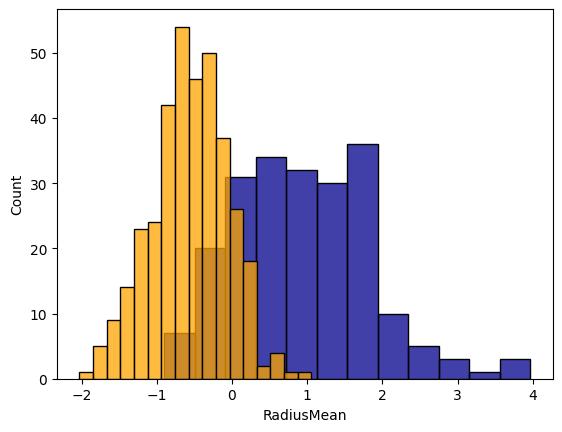

In [57]:
df3['Diagnosis'] = val_D              # Añadimos la columna diagnosis.
filt2 = df3['Diagnosis'] == 'B'

df_B = df3[filt2]
df_M = df3[-filt2]
sns.histplot(data= df_M, x= "RadiusMean",color='darkblue')
sns.histplot(data= df_B, x= "RadiusMean",color ='orange')


11. Para las columnas:
```python
cols=['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean']
```
realizar multiples histograma en un gráfico de [violin](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'RadiusMean'),
  Text(1, 0, 'TextureMean'),
  Text(2, 0, 'PerimeterMean'),
  Text(3, 0, 'AreaMean'),
  Text(4, 0, 'SmoothnessMean'),
  Text(5, 0, 'CompactnessMean'),
  Text(6, 0, 'ConcavityMean'),
  Text(7, 0, 'ConcavePointsMean')])

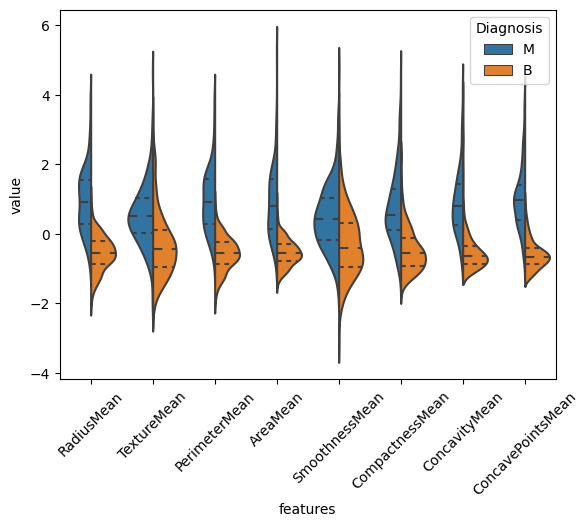

In [58]:
#Primero ordenamos la posición de la columnas ubicando con 'Diagnosis ' al comienzo del df seguida de 'DiagnosisNumeric'.
df3 = df3[['Diagnosis','RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean',
       'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
       'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean', 'RadiusSe',
       'TextureSe', 'PerimeterSe', 'AreaSe', 'SmoothnessSe', 'CompactnessSe',
       'ConcavitySe', 'ConcavePointsSe', 'SymmetrySe', 'FractalDimensionSe',
       'RadiusWorst', 'TextureWorst', 'PerimeterWorst', 'AreaWorst',
       'SmoothnessWorst', 'CompactnessWorst', 'ConcavityWorst',
       'ConcavePointsWorst', 'SymmetryWorst', 'FractalDimensionWorst','DiagnosisNumeric']]
#El método .melt() nos permite identificar las columnas de un dataframe, alguna como identificadora y otras columnas para desvincular.
data = pd.melt(df3.iloc[:, 0:9], id_vars='Diagnosis',var_name="features",value_name="value")
#Para graficar tenemos en cuenta los nombres de las columna en el nuevo df 'data' , organizado con el método anterior.
sns.violinplot(x="features",y="value",  hue='Diagnosis',data=data, split=True, inner="quart")
plt.xticks(rotation=45)

La grafica de 'RadiusMean' nos permite comparar con el histograma realizado en el punto anterior, notamos que en grafico de violín nos indica la misma información del histograma pero en una disposición diferente de la distribución de los valores del radio para las categorías 'B' y 'M'.


10. Determinar los datos [outlier](https://en.wikipedia.org/wiki/Outlier)  para la columna RadiusMean y eliminarlos del data frame, para ello construya un gráfico tipo [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

```
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))
```
¿Qué informacion podemos obtener de este tipo de graficos?


Usar el rango intercuartílico (IQR): El IQR es la diferencia entre el tercer y el primer cuartil de los datos, es decir, el 75% y el 25% de los valores ordenados. Los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de una columna llamada 'edad' usando el IQR, podemos hacer lo siguiente

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra forma de determinar los outlier es con el puntaje Z:
El puntaje Z es el número de desviaciones estándar que un valor está por encima o por debajo de la media. Los valores que tienen un puntaje Z mayor que un umbral (por ejemplo, 3) se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de la columna 'edad' usando el puntaje Z, podemos hacer lo siguiente:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

En un problema de machine learning se debe elegir todas las columnas y construir un algoritmo que permite obtener la mejor calidad de los datos sobre todas las columnas.


<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

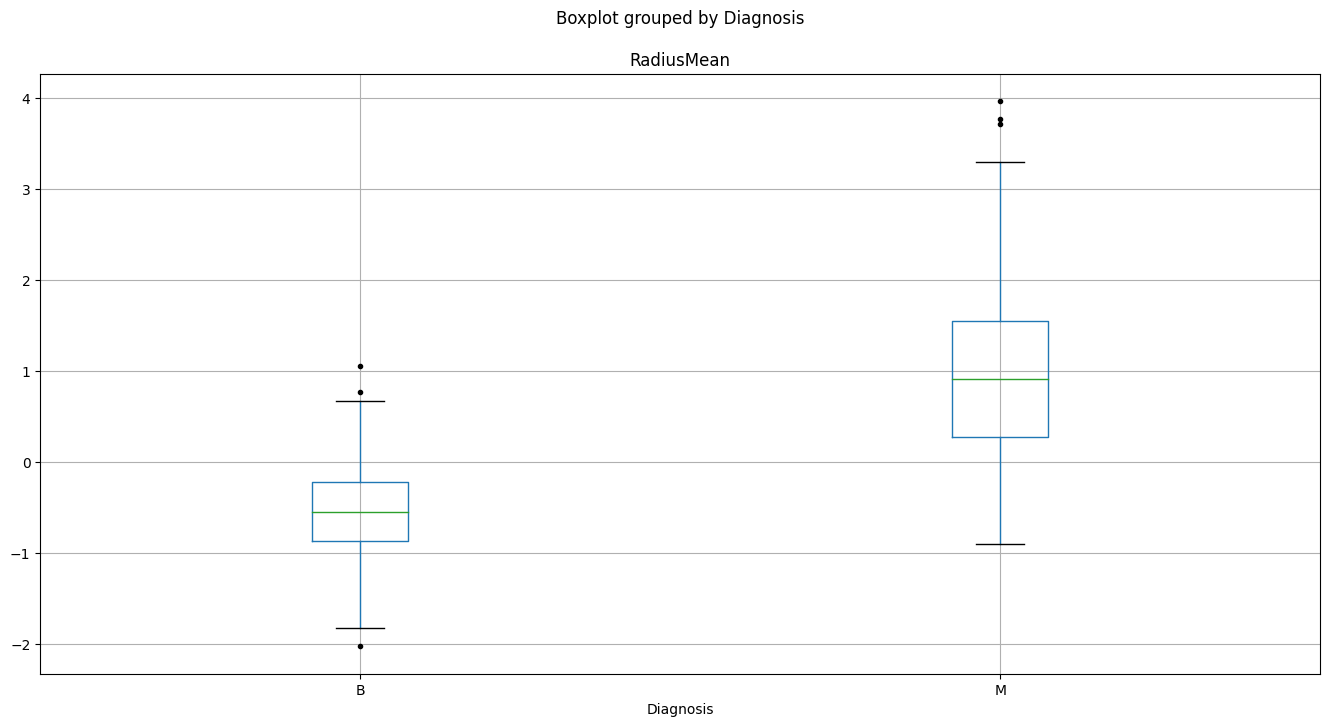

In [59]:
df3.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(16,8))

El gráfico de caja representa visualmente la dispersión de los datos, también la simetría de estos, ya que la línea verde es la mediana$(Q_2)$ separando el $50\%$ inferior y el $50\%$ superior de los datos proporcionando información sobre la simetría o asimetría de la distribución de los datos. Además detección de valores extremos  Los valores que están más allá de los bigotes del gráfico (fuera de 1.5 veces el IQR) se consideran outliers extremos y se representan como puntos individuales. Estos valores son visualmente identificables en el gráfico de caja y pueden requerir una atención especial al analizar los datos.

In [60]:
Q1 = df3['RadiusMean'].quantile(0.25)          #Definimos el punto del primer cuartil de los datos de 'RadiusMean'.
Q3 = df3['RadiusMean'].quantile(0.75)          #Definimos el punto del tercer cuartil de los datos de 'RadiusMean'.
IQR = Q3 - Q1
##Definimos un nuevo df sin los datos atípicos utilizando un filtro que remueva estos valores.
df_RM = df3[~((df3['RadiusMean'] < (Q1 - 1.5 * IQR)) | (df3['RadiusMean'] > (Q3 + 1.5 * IQR)))]
df_RM

,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
0,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,-1.296535
1,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,-1.296535
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,-1.296535
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,-1.296535
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,-1.296535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,-1.296535
565,M,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,-1.296535
566,M,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,-1.296535
567,M,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,-1.296535


In [61]:
df1_RM = df3[(np.abs(stats.zscore(df3['RadiusMean'])) < 3)]
df1_RM

,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst,DiagnosisNumeric
0,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,-1.296535
1,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,-1.296535
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,-1.296535
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,-1.296535
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,-1.296535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,-1.296535
565,M,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,-1.296535
566,M,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,-1.296535
567,M,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,-1.296535


Notamos que los métodos eliminaros una cantidad diferente de valores, donde mejor resultado la limpieza de los datos utilizando el (IQR) debido a que el método de puntuación z únicamente elimino dos valores, cuando en el boxplot se ven un mayor numero de valores atípicos.

11. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

<ipython-input-62-3175602326d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_RM.corr()


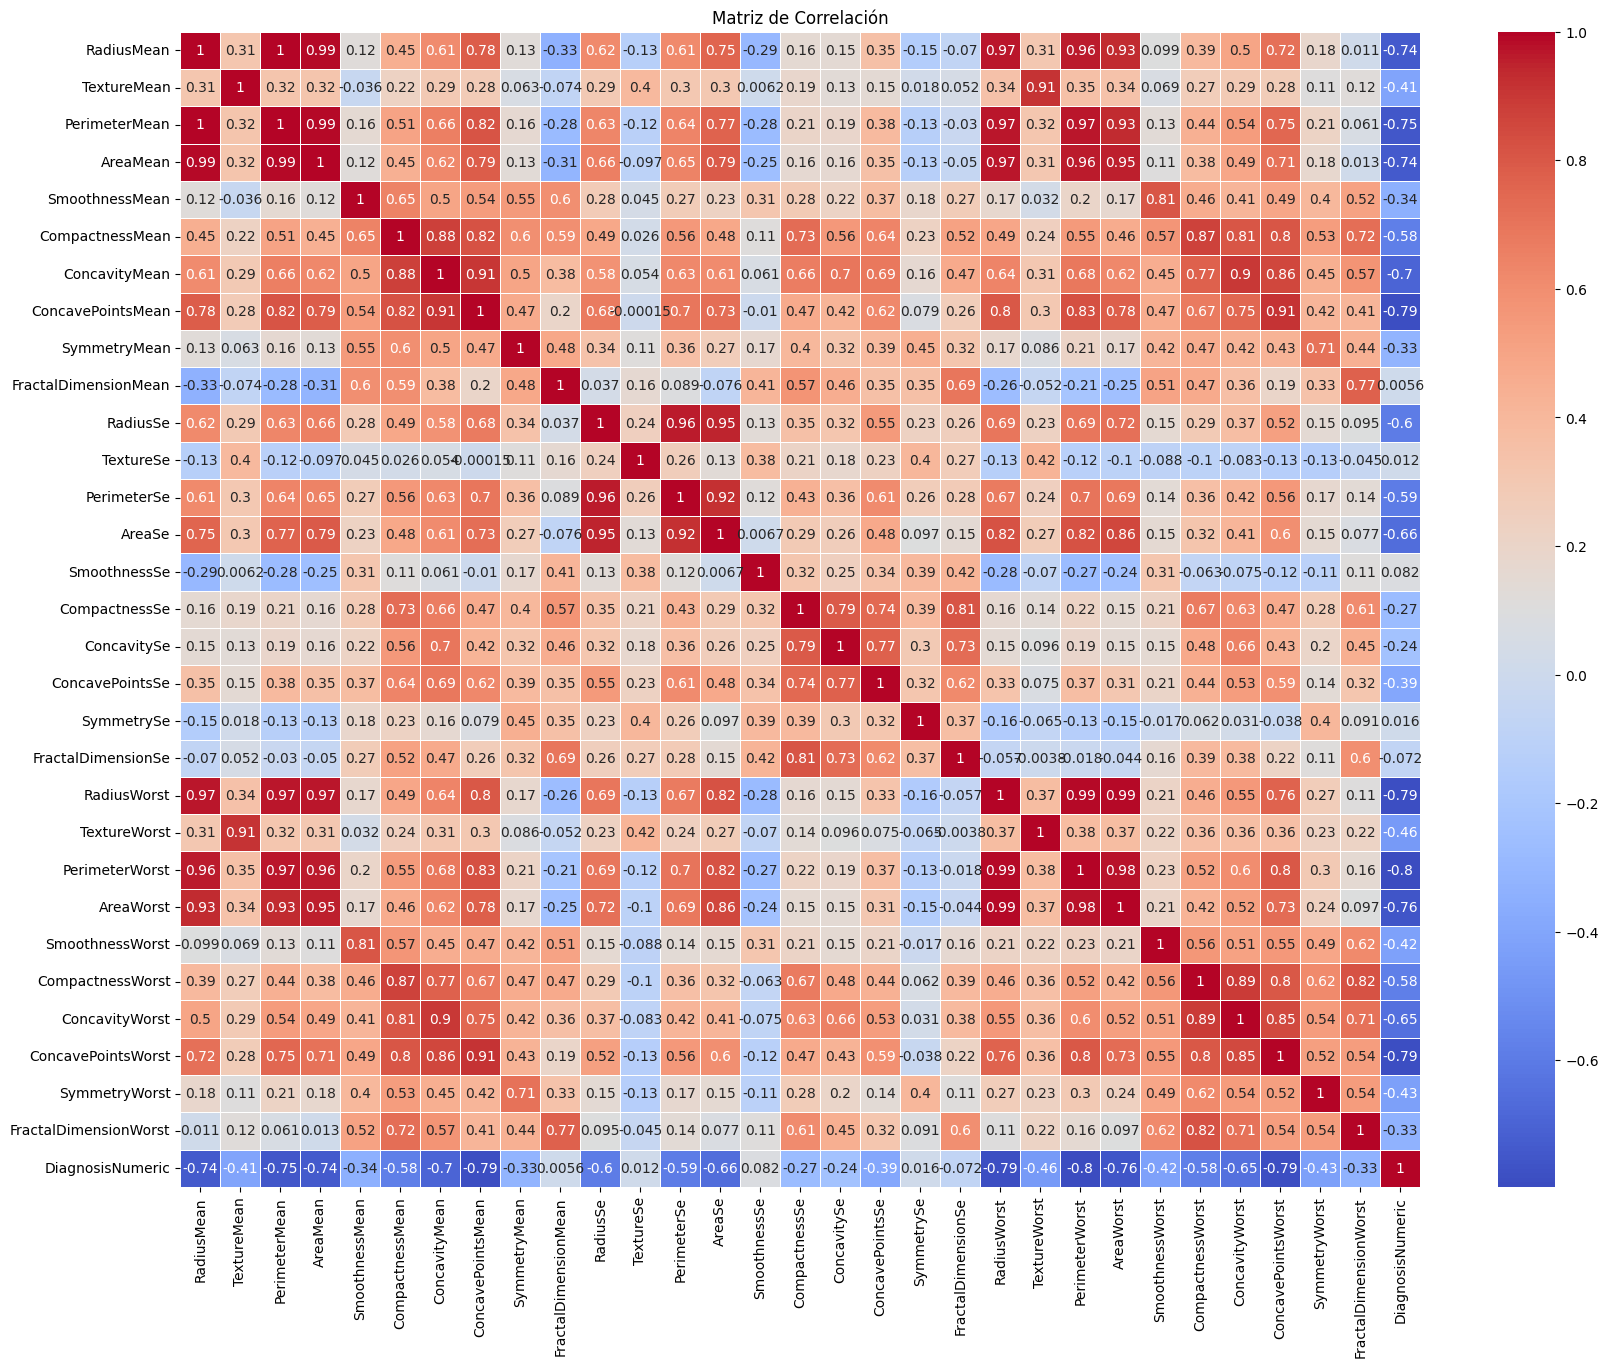

In [62]:
#correlation_matrix = df_RM.iloc[:,0:10].corr()
correlation_matrix = df_RM.corr()

plt.figure(figsize=(20, 15))

# Utiliza el método heatmap() de Seaborn para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()



12. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

También se pueden utilizar scatterplots para ver gráficamente los resultados de la matriz de correlación, mientras mas cercano a uno sea el valor de correlación de dos conjuntos de datos, esta grafica se acercara a una línea recta vemos un ejemplo.

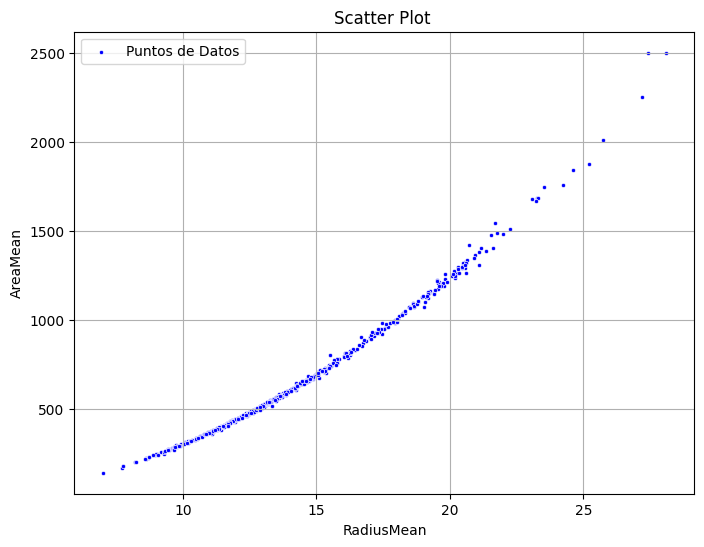

In [63]:

# Crear un scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='RadiusMean', y='AreaMean', color='blue', marker='.', label='Puntos de Datos')

plt.title('Scatter Plot ')
plt.grid()
plt.show()


'RadiusMean' y 'AreaMean' tiene un valor de $0.99$ en la matriz de correlación por lo cual la grafica es casi una línea recta.


# Laboratorio 1.1: Series de tiempo

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

1. Leer el dataset desde el github.

In [5]:
path2 = "https://raw.githubusercontent.com/Emmanuelsv/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"
df2 = pd.read_csv(f"{path2}")
df2

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


In [6]:
dfi = df2.set_index('time')
dfi

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


3. Obtenga información del data frame.

In [7]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8+ KB


In [8]:
dfi.describe()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,1443.520003,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.000000,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1249.750000,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,2499.500000,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,3749.250000,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,4999.000000,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


4. Determine si hay null, nan en el data frame.

In [9]:
dfi.isna().sum()

Unnamed: 0            0
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

In [10]:
dfi.isnull().sum()

Unnamed: 0            0
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

5. Emplea la notacion Pascal Case y trabaja solo con la columna del precio de cierre del eur/usd.  

In [11]:
# Obtiene las columnas del DataFrame dfi y las almacena en la variable col.
col = dfi.columns

# Inicializa una lista vacía llamada new_cols que se utilizará para almacenar los nombres de columnas convertidos a PascalCase.
new_cols = []

# Itera a través de cada nombre de columna en la lista col.
for column_name in col:

    # Utiliza una expresión regular para identificar palabras en PascalCase en el nombre de la columna.
    # La expresión regular busca grupos de letras minúsculas seguidas de mayúsculas (o mayúsculas seguidas de mayúsculas) en el nombre de la columna.
    words = re.findall(r'[A-Z]?[a-z]+|[A-Z]+(?=[A-Z]|$)', column_name)

    # Capitaliza cada palabra encontrada en el paso anterior y almacena las palabras capitalizadas en la lista capitalized_words.
    capitalized_words = [word.capitalize() for word in words]

    # Combina las palabras capitalizadas en una sola cadena para formar el nombre en PascalCase.
    pascal_case_name = ''.join(capitalized_words)

    # Agrega el nombre en PascalCase a la lista new_cols.
    new_cols.append(pascal_case_name)

# Imprime la lista de nombres en PascalCase resultantes.
print(new_cols)



['Unnamed', 'Open', 'High', 'Low', 'Close', 'TickVolume', 'Spread', 'RealVolume', 'MeanCloseOpen', 'DiffClose', 'DiffOpen', 'DiffMeanCloseOpen']


In [12]:
dfi.columns = new_cols
dfi

,Unnamed,Open,High,Low,Close,TickVolume,Spread,RealVolume,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


In [13]:
df_col = dfi['Close']
df_col = pd.DataFrame(df_col)
df_col

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.



In [14]:
df_col["DiffPrice"] = df_col.diff()
df_col

,Close,DiffPrice
time,,
2022-07-25 13:00:00,1.02345,NaN
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


- Para la nueva columna construya un histograma de los datos.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='DiffPrice', ylabel='count'>

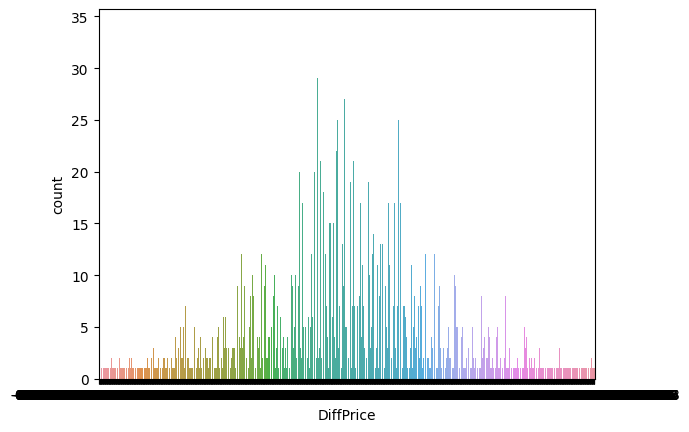

In [15]:
import seaborn as sns


sns.countplot(df_col, x="DiffPrice")

Dejamos el punto del ajuste del histograma para el final para evitar problemas con la librería fitter.

5. Para el data frame, seleccionemos solo los datos del 2023.

In [19]:
#Creamos un filtro que contiene True para las filas cuyo índice sea mayor o igual a la fecha "2023" y False para las filas con fechas anteriores a "2023".
tf = df_col.index>="2023"
n_df = df_col[tf]
n_df

,Close,DiffPrice
time,,
2023-01-02 0:00:00,1.06796,-0.00200
2023-01-02 1:00:00,1.06965,0.00169
2023-01-02 2:00:00,1.07058,0.00093
2023-01-02 3:00:00,1.06896,-0.00162
2023-01-02 4:00:00,1.06880,-0.00016
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


5. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes.

In [59]:
# Convierte el índice a un DatetimeIndex si aún no lo es
n_df.index = pd.to_datetime(n_df.index)

promedio_quincenal = n_df.groupby(pd.Grouper(freq='15D')).mean()
promedio_semanal = n_df.groupby(pd.Grouper(freq='1W')).mean()
promedio_mensual = n_df.groupby(pd.Grouper(freq='1M')).mean()

promedio_mensual

,Close,DiffPrice
time,,
2023-01-31,1.077463,0.000031
2023-02-28,1.071167,-0.000060
2023-03-31,1.070874,0.000049
2023-04-30,1.096051,0.000036
2023-05-31,1.098980,-0.000069


6. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


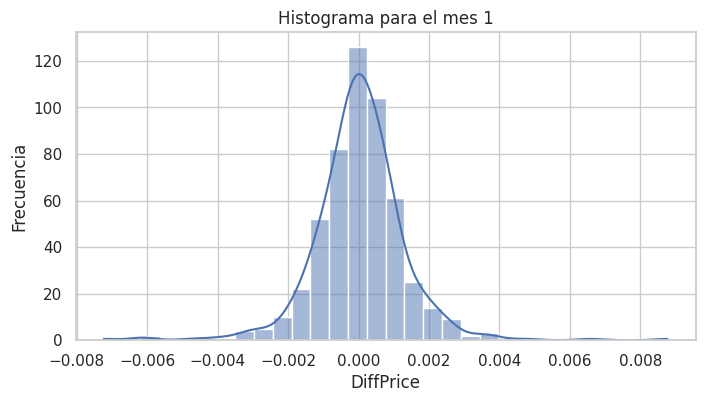

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


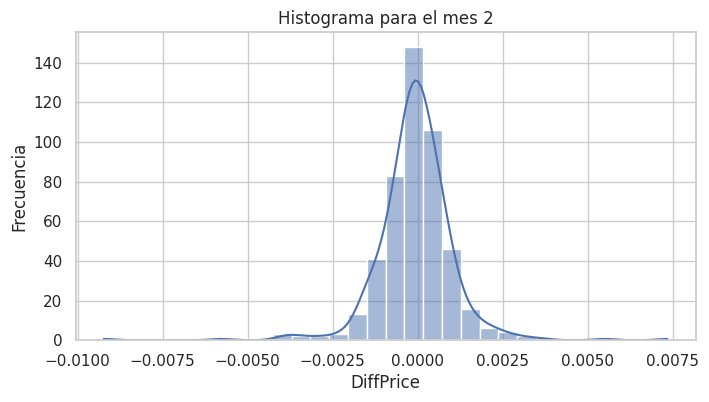

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


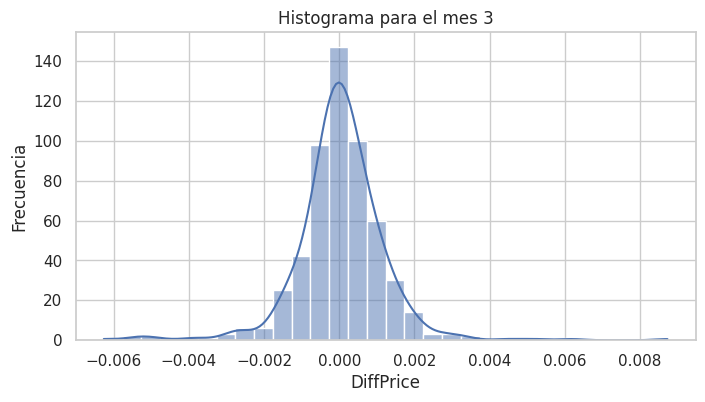

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


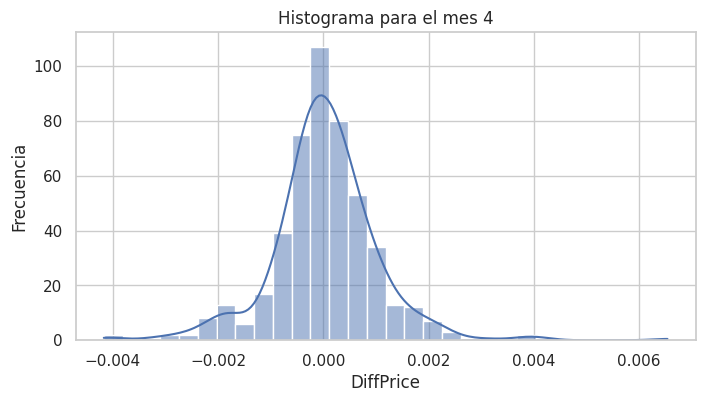

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


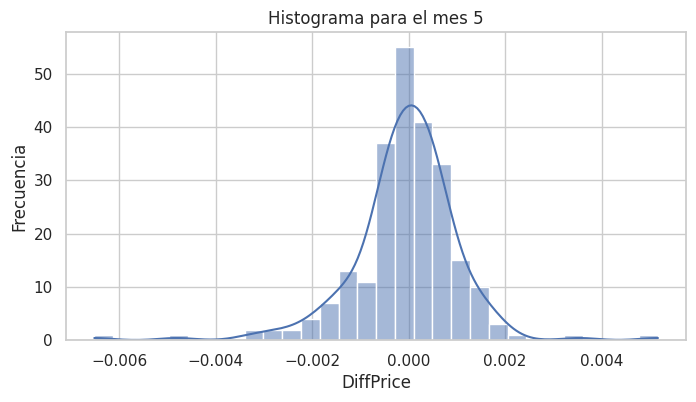

In [72]:
df_mensual = n_df.groupby(n_df.index.month)

for name, group in df_mensual:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=group, x='DiffPrice', bins=30, kde=True)
    plt.title(f'Histograma para el mes {name}')
    plt.xlabel('DiffPrice')
    plt.ylabel('Frecuencia')
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
<ipython-input-74-e998178abd9e>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data_month, x="DiffPrice", common_norm=False, palette="tab10", fill=True, ax=ax)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
<ipython-input-74-

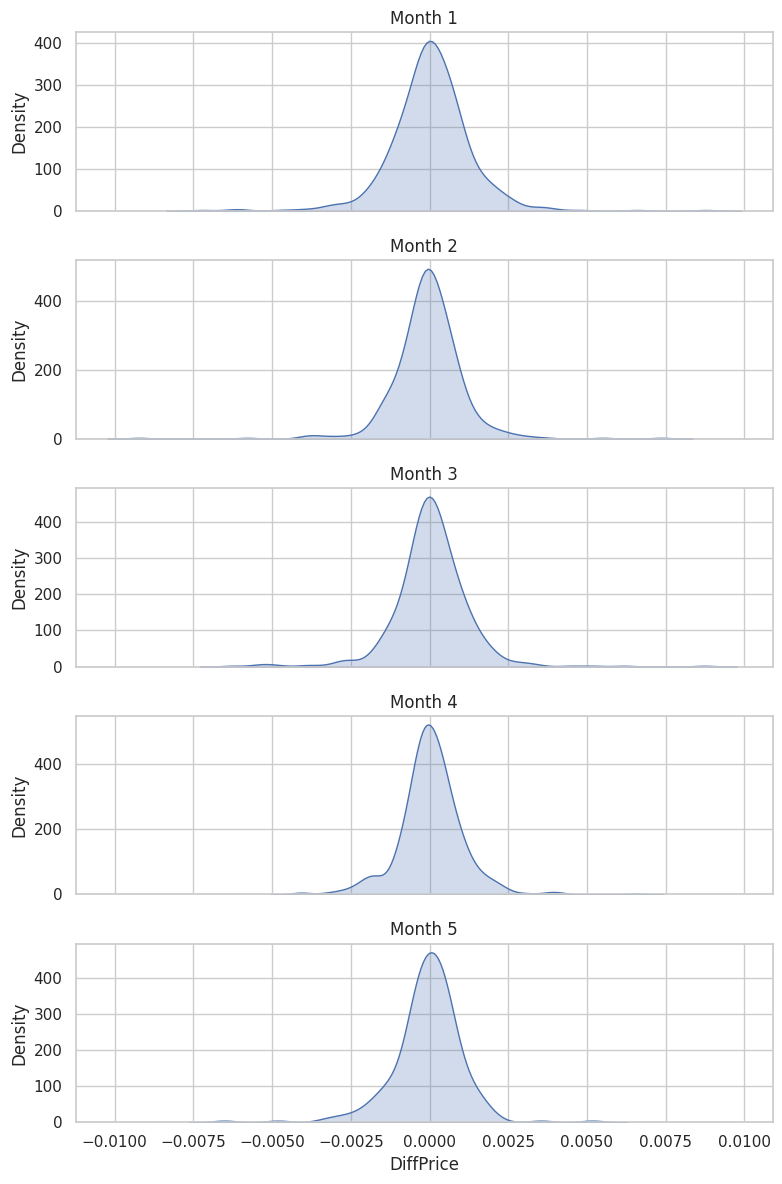

In [74]:

# Configura el estilo de Seaborn
sns.set(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})

# Crea un subplote para cada mes
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12), sharex=True)
months = range(1, 6)

for month, ax in zip(months, axes):
    data_month = n_df[n_df.index.month == month]
    sns.kdeplot(data=data_month, x="DiffPrice", common_norm=False, palette="tab10", fill=True, ax=ax)
    ax.set_ylabel('Density')
    ax.set_title(f'Month {month}')

# Añade etiquetas al eje x solo en el último subplote
axes[-1].set_xlabel('DiffPrice')

# Ajusta el espacio entre subplots
plt.tight_layout()

# Muestra los subplots
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

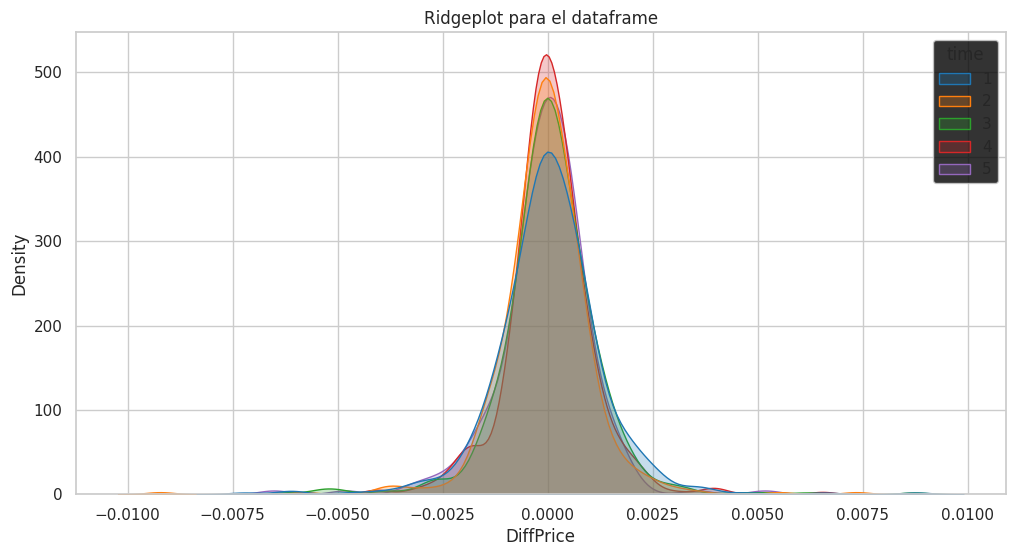

In [75]:
#Este es un código alternativo para hacer el grafico buscado pero con todas las distribuciones en un mismo grafico.
sns.set(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})

# Crea el ridgeplot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=n_df, x="DiffPrice", hue=n_df.index.month, common_norm=False, palette="tab10", fill=True)
plt.xlabel('DiffPrice')
plt.ylabel('Density')
plt.title('Ridgeplot para el dataframe')
plt.show()

de las graficas notamos que la diferencia de precio tiene un distribución similar en el tiempo , ya que para cada mes las distribuciones tienen medias y desviaciones muy cercanas.

- Determine la mejor distribucion estadística que se ajusta al histograma anterior.

In [76]:
!pip install fitter

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsu,1674.160558,9.862440,35.931213,inf,0.011121,5.626273e-01
lognorm,106649.028247,3075.244455,3094.796035,inf,0.091619,5.664225e-37
norm,106890.256569,3181.836188,3194.870574,inf,0.090556,3.956993e-36
beta,107062.596684,3149.040296,3175.109069,inf,0.091361,9.098385e-37
alpha,115470.641169,2869.298421,2888.850000,inf,0.102043,8.827057e-46


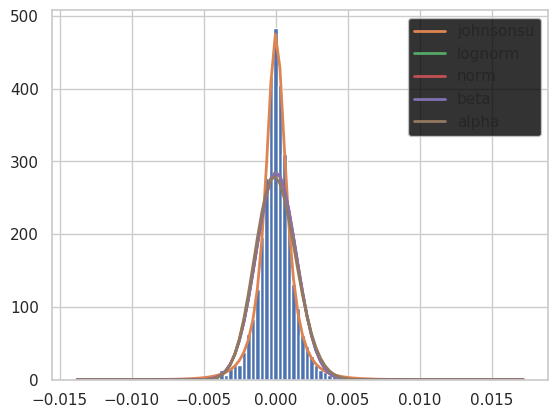

In [78]:
from fitter import Fitter, get_common_distributions, get_distributions
# Obtiene los valores de la columna "DiffPrice" del DataFrame df_col y los almacena en la variable height.
height = df_col["DiffPrice"].values

# Establece el primer valor en la variable height como 0. Esto parece ser una modificación específica del valor en la primera posición de los datos.
height[0] = 0

# Crea una instancia de la clase Fitter, que se utiliza para ajustar diversas distribuciones estadísticas a los datos.
f = Fitter(height,
           distributions=['lognorm',
                          "beta",
                          "burr",
                          "norm",
                          "alpha",
                          "uniform",
                          "gausshyper", # Distribución hipergeométrica gaussiana
                          "invweibull", # Distribución inversa Weibull
                          "johnsonsu"]) # Distribución Johnson SU

# Realiza el ajuste de las distribuciones estadísticas a los datos.
f.fit()

# Genera un resumen de los resultados del ajuste, que incluye estadísticas y parámetros de las distribuciones probadas.
f.summary()


In [80]:
# Indentificamos parametros de algunas distrubiciones.
parametros_beta = f.fitted_param["beta"]
parametros_norm = f.fitted_param["norm"]
parametros_best = f.get_best(method = 'sumsquare_error')


print("Parámetros de la distribución beta:",parametros_beta)
print("Parámetros de la distribución normal:",parametros_norm)
display("Parámetros de la mejor distribución :",parametros_best)


Parámetros de la distribución beta: (9629.236781777083, 19249.08933491932, -0.1683919325457629, 0.5050441923223208)
Parámetros de la distribución normal: (1.2298000000000008e-05, 0.0014003393514416419)


'Parámetros de la mejor distribución :'

{'johnsonsu': {'a': -0.020649555008380997,
  'b': 1.049520703155364,
  'loc': -1.5179836419355817e-05,
  'scale': 0.0008804059741908442}}